# Segmentace obrazu - text a jeho čtení
Cvičení je zaměřené na správné využití osvětlení při nasvícení objektu a následné využití metod pro segmentaci obrazu. Segmentovaný snímek je převeden na text pomocí OCR (optical character recognition).

<img src="images/ocr.png" width="300">

Ke čtení je využita knihovna [**Tesseract OCR**](https://github.com/tesseract-ocr/tesseract).

### Import knihoven a konfigurace

In [3]:
%run ./library.ipynb

### Pomocné funkce
Z následujících funkcí je potřeba vybírat ty vhodné pro splnění úkolu. Parametry a implementaci funkcí si můžete zobrazit pomocí příkazu `help(function_name)` nebo na https://gitlab.fit.cvut.cz/bi-svz/improutils_package/tree/master/improutils.

Seznam funkcí pro přehlednost:

- [`to_gray(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/blob/master/improutils/preprocessing/preprocessing.py#L4)
- [`negative(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/blob/master/improutils/preprocessing/preprocessing.py#L53)
- [`crop(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/blob/master/improutils/preprocessing/preprocessing.py#L99)

- [`rotate(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/blob/master/improutils/preprocessing/preprocessing.py#L184)

- [`segmentation_one_threshold(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/segmentation/segmentation.py#L56)
- [`segmentation_auto_threshold(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/segmentation/segmentation.py#L74)
- [`segmentation_two_thresholds(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/segmentation/segmentation.py#L90)
- [`segmentation_adaptive_threshold(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/segmentation/segmentation.py#L109), vysvětlení [použití](https://courses.fit.cvut.cz/BI-SVZ/showroom/adaptive_thresholding/index.html)

- [`find_contours(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/preprocessing/contours.py#L40)
- [`fill_holes(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/preprocessing/contours.py#L74)

- [`filtration_median(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/filtration/filtration.py#L22)

- [`ocr(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/recognition/ocr.py#L7)

- [`cv2.morphologyEx(...)`](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html)
- [`cv2.dilate(...)`](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html)
- [`cv2.erode(...)`](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html)
- vysvětlení k morfologickým operacím [zde](https://courses.fit.cvut.cz/BI-SVZ/showroom/morfologie/index.html)

- [`cv2.minAreaRect(...)`](https://theailearner.com/tag/cv2-minarearect/)
- [`cv2.boxPoints(...)`](https://theailearner.com/tag/cv2-minarearect/)

- `find_holes(...)`, nachází se v souboru *library.ipynb*
- template pro `interact slider`, jenž můžete (ale nemusíte) použít při segmentaci, je také v souboru *library.ipynb*

---

### Úkoly

1. Změřte velikost placky s nápisem FIT v pixelech - výška, šířka.

1. Zvolte vhodné funkce pro segmentaci obrazu a přečtěte text z obrázku snímaném kamerou. Po vyladění algoritmu, využijte předzpracovaný obrázek a nechte ho přečíst OCR. V případě, že výsledek bude po porovnání `True`, úkol jste splnili.

Pro každý z úkolů je nutné zvolit vhodný typ osvětlení a následně placku nasnímat monochromatickou kamerou. Na každý úkol bude v ideálním případě potřeba jiný snímek. Volba vhodného nasvícení usnadní algoritmickou část úkolu. Při špatné volbě osvětlení nebude úkol uznán!

Pro volbu vhodné iluminační techniky a vhodného osvětlení můžete konzultovat přehledový dokument [Volba vhodného osvětlení v kombinaci s kamerou](https://courses.fit.cvut.cz/BI-SVZ/showroom/illumination/index.html), nebo  přednášku [Kamerový systém a zpracování obrazu](https://courses.fit.cvut.cz/BI-SVZ/lectures/files/bi-svz-03-kamerovy-system-a-zpracovani-obrazu.pdf).

#### 1) Nasnímejte placky s nápisem FIT a zobrazte.
Snímky uložte do jedné složky. Použijte vhodné osvětlení!

**POZOR:** Přestože pracujeme s monochromatickou kamerou, nemusí mít snímky z kamery jeden kanál ve stupních šedi, jak bychom očekávali. Typicky může mít snímek 3 kanály (RGB). Závisí to na nastavení parametru [PIXEL_FORMAT](https://docs.baslerweb.com/pixel-format) kamery. Před prací se snímky si ověřte, že pracujete se správným typem snímku. Snímky si můžete do vhodného formátu převést/nastavit vhodně parametr **PIXEL_FORMAT** kamery.

Celkem nalezených obrázků: 1


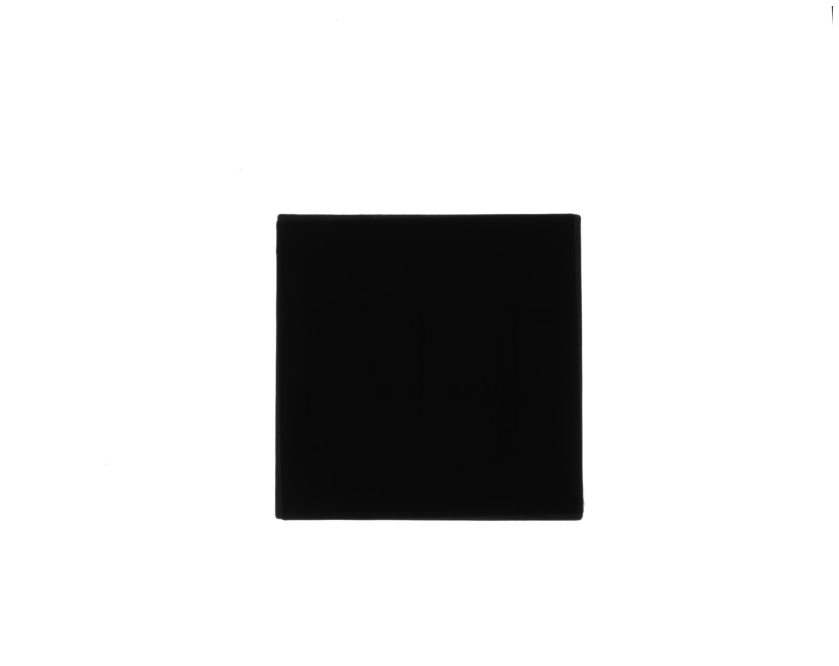

In [76]:
path = "data2/" ### nezapomeňte cestu zakončit '/'
files = os.listdir(path)

images = []

for f in files:
    image = load_image(path + f) ### načtěte obrázek
    images.append(image)
        
print('Celkem nalezených obrázků: ' + str(len(images)))
plot_images(*images) #zobrazte snímky

#### 2) Změřte rozměry placky v pixelech

Úkolem je ze snímku segmentovat placku a změřit její rozměry - výška, šířka v pixelech.

Rozměry jsou vykresleny do původního snímku viz. obrázek. Pro pozicování textu a obrysu placky využijte znalost kontury, ze které byly hodnoty vypočítány. Pokud jsou vaše rozměry zobrazeny na opačné straně oproti referenčnímu obrázku, je to také správně.

<img src="images/measures_ref.png" width="300">

In [79]:
def measurement_algorithm(img):
    
    ### algoritmus segmentace a měření placky
    
    sizes_drawn = img.copy()
    
    mask = segmentation_two_thresholds(to_gray(images[0]), 183, 255)
    contour_drawn, contours_count, contours = find_contours(mask, min_area=1000, external=False)
    
    rect = cv2.minAreaRect( contours[0] ) ### doplňte správně vstup
    height, width = rect[ 1 ] ### vyberte index, obsahující informaci o výšce a šířce 
    points = cv2.boxPoints( rect ) 
    points = np.int0(points) ### přetypujte na správný datový typ pro vykreslení

    cv2.line(sizes_drawn, points[0], points[1], color=(255, 0, 0), thickness=15)
    cv2.putText(sizes_drawn, "{:.2f} px".format(width), points[0], 0, 1.5, (0, 0, 255), 2)
    
    cv2.line(sizes_drawn, points[1], points[2], color=(255, 0, 0), thickness=15)
    cv2.putText(sizes_drawn, "{:.2f} px".format(height), points[2], 0, 1.5, (0, 0, 255), 2)

    return mask, sizes_drawn

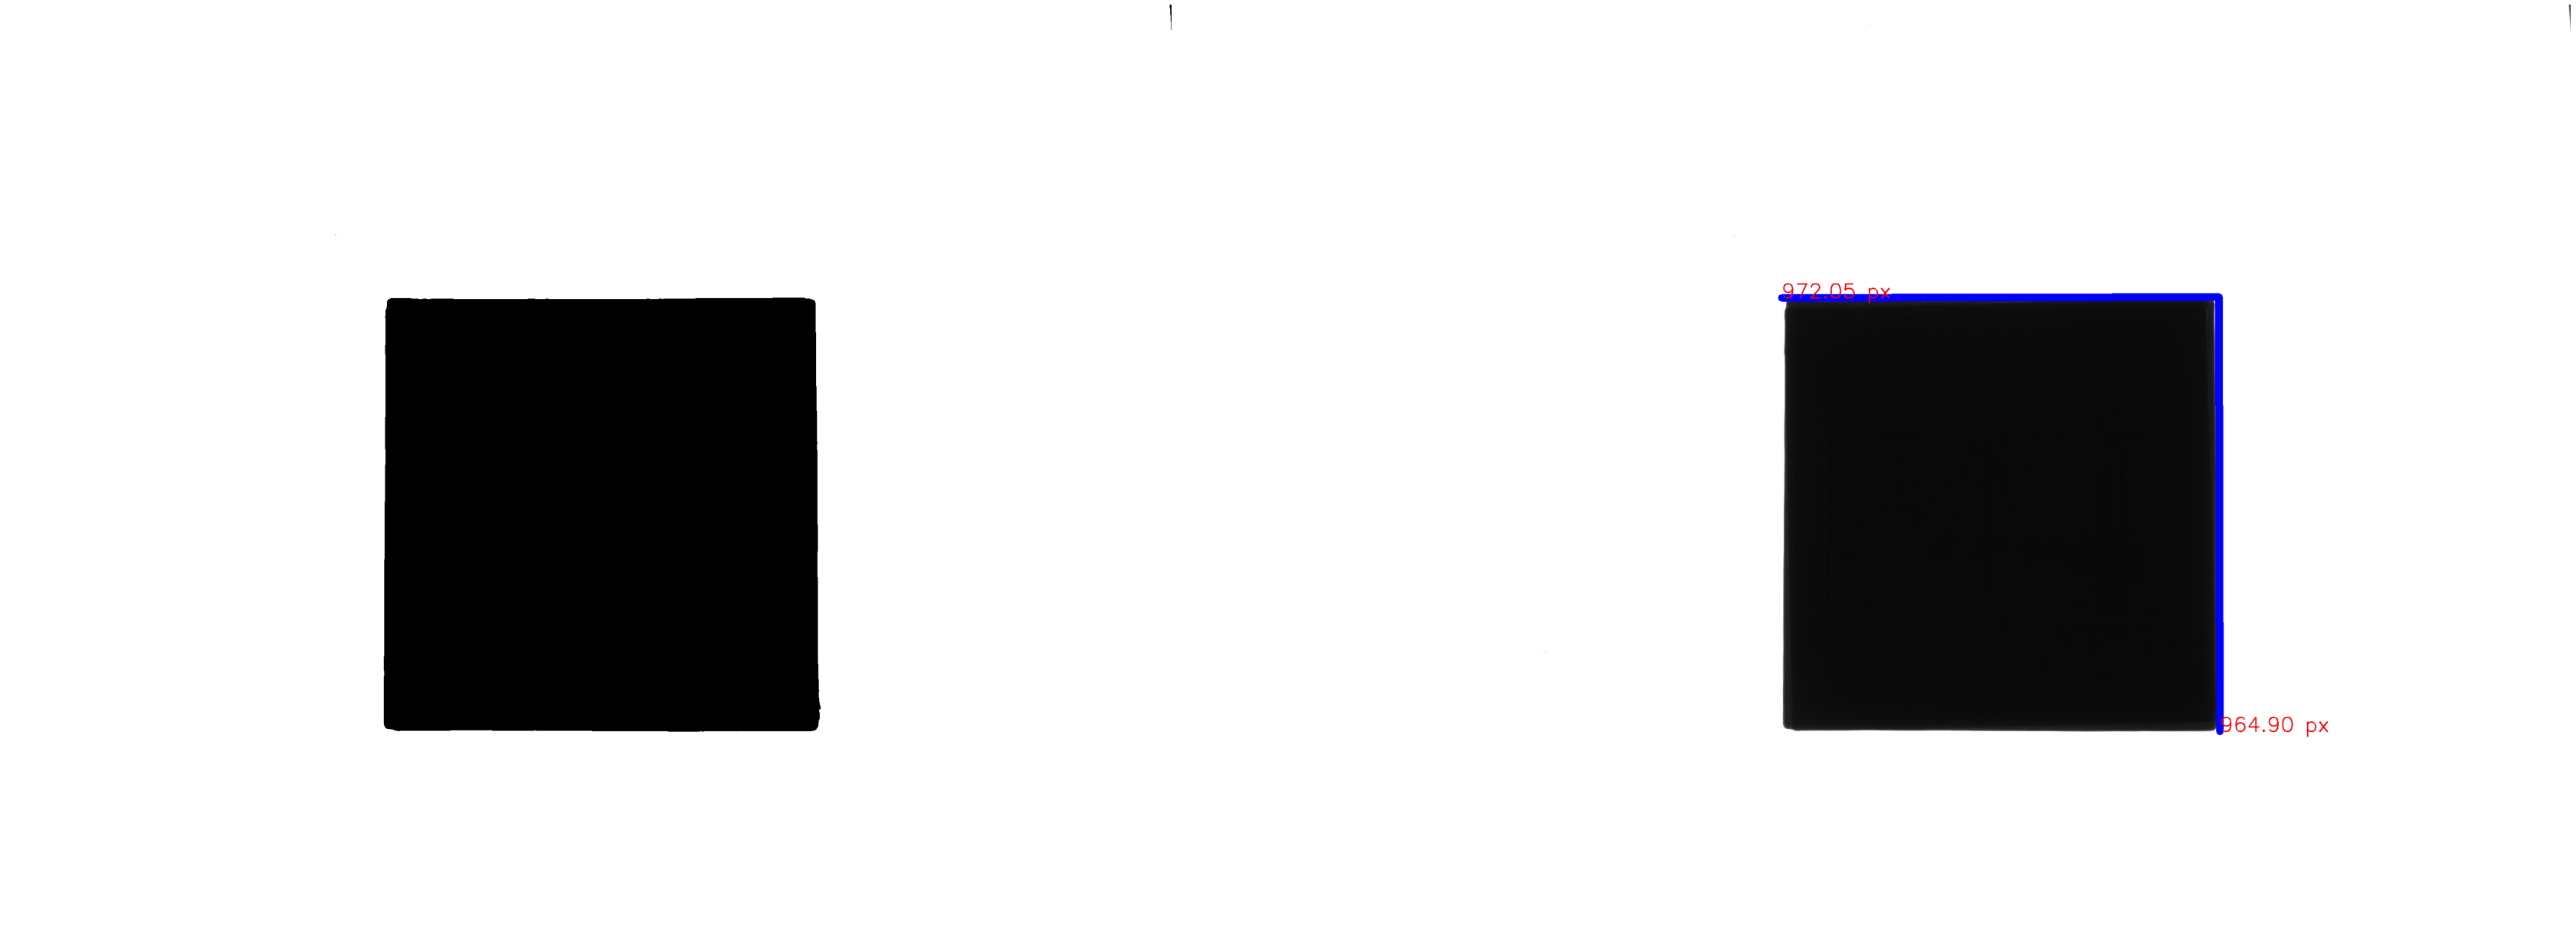

In [80]:
img_measures = images[0]  ### doplňte index
mask, sizes_drawn = measurement_algorithm(img_measures)
plot_images(mask, sizes_drawn)

#### 3) Doplňte algoritmus pro segmentaci textu z nasnímaných placek.
Výstupem algoritmu by měl být binární obraz, kde pozadí má černou barvu a objekty (popředí) bílou. Binární obrázek zobrazte.

**HINT:** Může (ale nemusí) se vám hodit funkce `find_holes(...)` pro segmentaci textu (funkce není součástí Improutils).

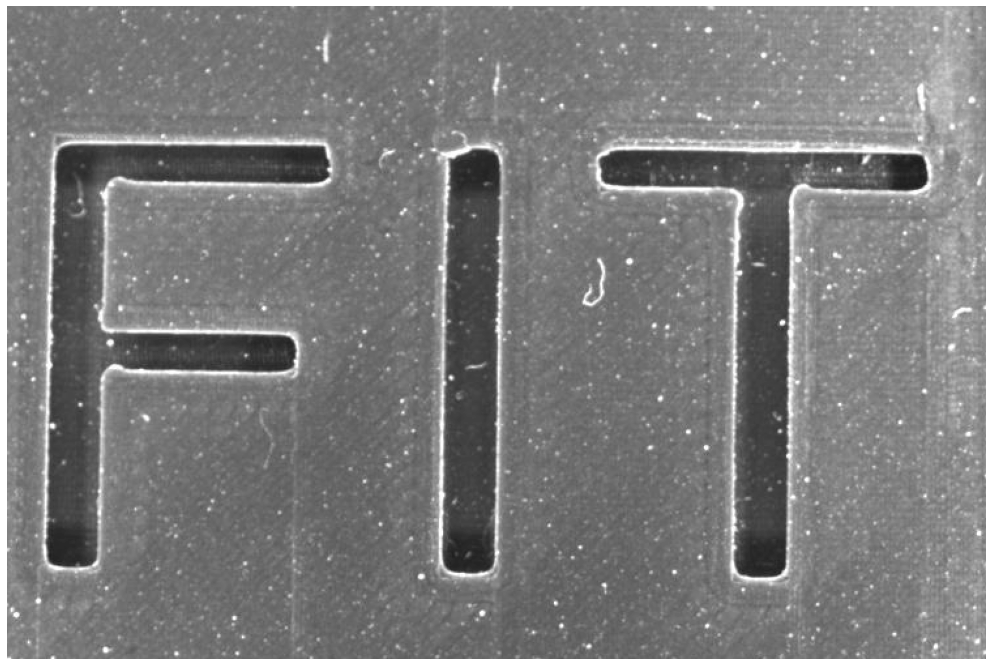

In [93]:
img = load_image("data3/0.jpg")
img = to_gray(img)
img = crop(img, 900, 600, 1650, 1100)
plot_images(img)


In [108]:
@interact(value=create_slider(min=0, max=255, description='Value'))
def _(value):
    mask = segmentation_two_thresholds(img, value[0], value[1]) ###
#     mask = segmentation_auto_threshold(img)
    plot_images(mask, img, titles=['Segmentation', 'Original'])

interactive(children=(IntRangeSlider(value=(0, 255), continuous_update=False, description='Value\xa0\xa0\xa0\x…

In [133]:
def segmentation_algorithm(img):
    ### algoritmus segmentace textu 
#     img = crop(...)
    
    mask = segmentation_two_thresholds(img, 166, 255)
    mask = fill_holes(mask)
    kernel = np.ones((30,30),np.uint8)

    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    return mask

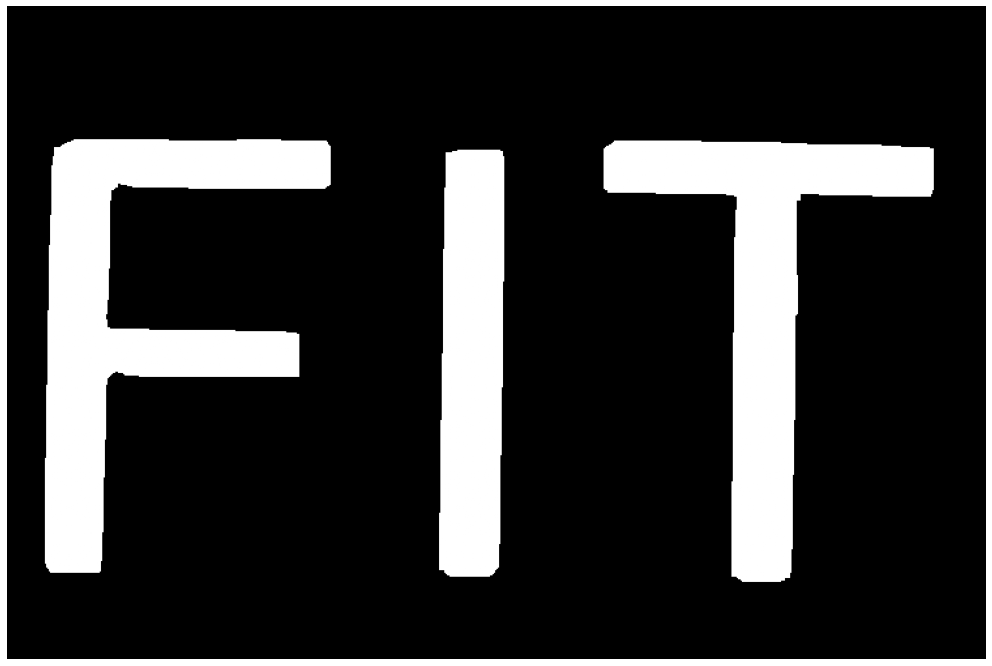

In [134]:
img_text = img ### doplňte index
img_bin = segmentation_algorithm(img_text)

plot_images(img_bin)

#### 4) Využijte funkční algoritmus na snímky.
**POZOR:** Dokud nebude vstupní obraz vypadat následovně, **NEPOUŠTĚJTE** se do další části. 

<img src="images/fit_preprocessed.png" width="200">

#### 5) Využijte OCR na výsledný binární obrázek a zkontrolujte správnost.
**HINT:** Pokud se požadovaný výstup OCR neshoduje s referenčním textem, zařiďte aby nebyl text na obrázku nijak rotován a kolem textu byl alespoň 20px rámeček. Důvodem je použití Tesseract OCR, jenž je na dané věci velice náchylný.

In [135]:
text = ocr(img_bin) ###
ref_text = 'FIT'

print('Přečtený text je: ' + "'" + text.strip() + "'\n")
if text.strip() == ref_text:
    print('-> Úkol jste splnili!\n')
else:
    print('-> Úkol je třeba dál ladit ...')    
print('')


Přečtený text je: 'FIT'

-> Úkol jste splnili!




### 6) Bonusová část - změřte rozměry kostičky v milimetrech

Změřte a zobrazte rozměry placky v milimetrech, když víte že výška písmena I je 18 mm.

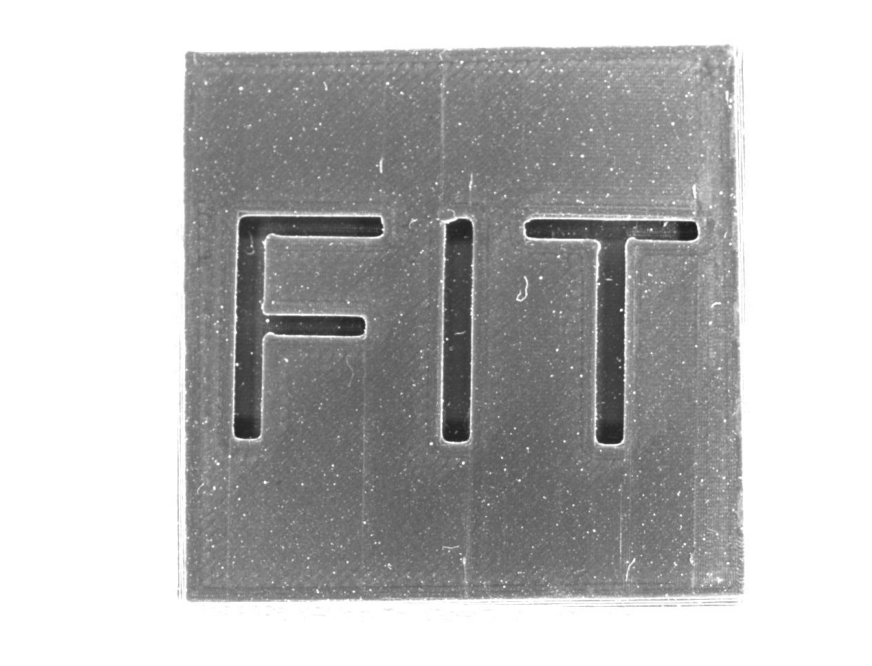

In [145]:
img = load_image("data3/0.jpg")
img = to_gray(img)
img = crop(img, 600, 400, 1850, 1350)
plot_images(img)


In [146]:
@interact(value=create_slider(min=0, max=255, description='Value'))
def _(value):
    mask = segmentation_two_thresholds(img, value[0], value[1]) ###
    plot_images(mask, img, titles=['Segmentation', 'Original'])
    

interactive(children=(IntRangeSlider(value=(0, 255), continuous_update=False, description='Value\xa0\xa0\xa0\x…

In [167]:
def measurement_algorithm(img):
    
    ### algoritmus segmentace a měření placky
    
    sizes_drawn = img.copy()
    
    mask = segmentation_two_thresholds(to_gray(img), 0, 247)
    contour_drawn, contours_count, contours = find_contours(mask, min_area=1000, external=False)
    
    rect = cv2.minAreaRect( contours[0] ) ### doplňte správně vstup
    height, width = rect[ 1 ] ### vyberte index, obsahující informaci o výšce a šířce 
    points = cv2.boxPoints( rect ) 
    points = np.int0(points) ### přetypujte na správný datový typ pro vykreslení

    cv2.line(sizes_drawn, points[0], points[1], color=(255, 0, 0), thickness=15)
    cv2.putText(sizes_drawn, "{:.2f} px".format(width), points[0], 0, 1.5, (0, 0, 255), 2)
    
    cv2.line(sizes_drawn, points[1], points[2], color=(255, 0, 0), thickness=15)
    cv2.putText(sizes_drawn, "{:.2f} px".format(height), points[2], 0, 1.5, (0, 0, 255), 2)

    return mask, sizes_drawn, width, height

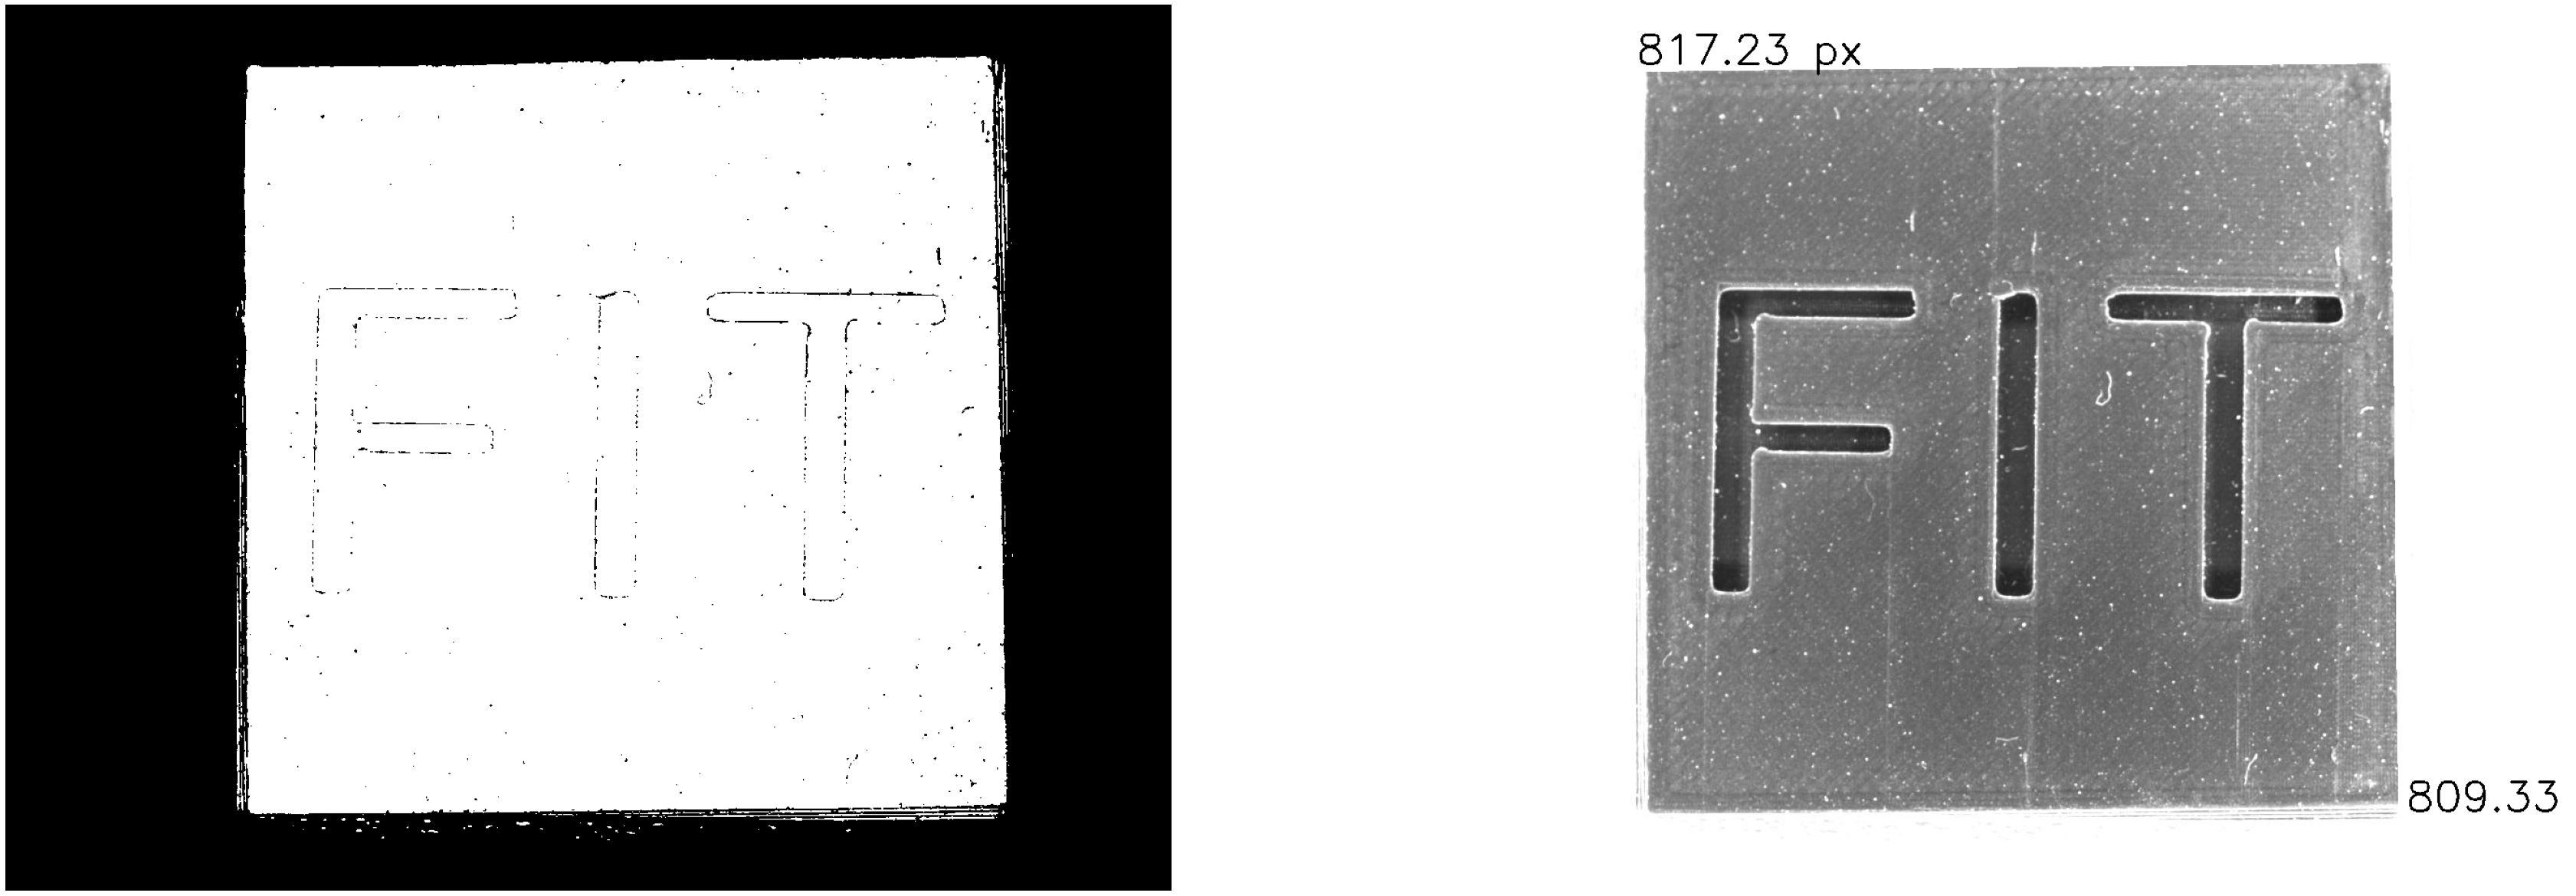

In [168]:
img_measures = img  ### doplňte index
mask, sizes_drawn, width, height = measurement_algorithm(img_measures)
plot_images(mask, sizes_drawn)

46.59762191772461 809.3329467773438
2095.1661477493662 2115.618969511512


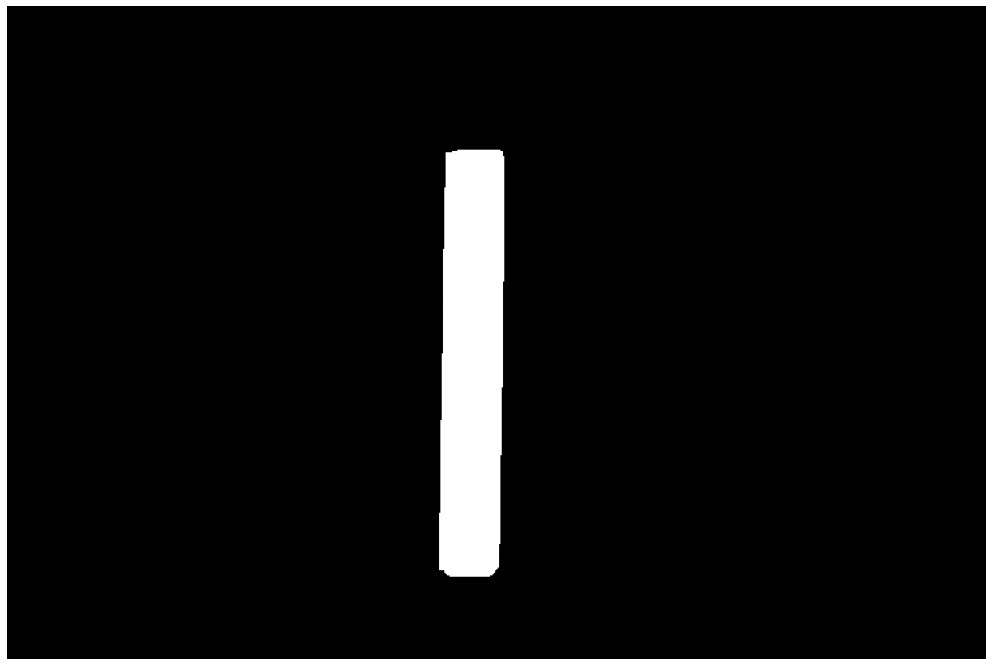

In [180]:
contour_drawn, contours_count, contours = find_contours(img_bin, 50, 20000, external=False)

rect = cv2.minAreaRect( contours[0] ) ### doplňte správně vstup
heighti, widthi = rect[ 1 ]
ratio = 18 / (heighti)
print(heighti, height)
print(height/ratio, width/ratio)
plot_images(contour_drawn)